In [1]:
# from google.colab.patches import cv2_imshow

In [5]:
import numpy as np
from PIL import Image
import os
import cv2
%matplotlib inline
import cv2
from matplotlib import pyplot as plt

# image input and play

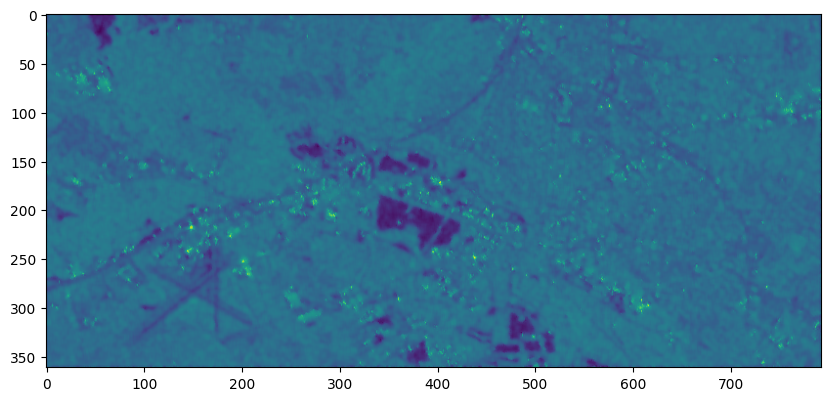

In [6]:
from matplotlib.pyplot import figure
from PIL import Image


input_image = Image.open("Resources/input.tif") #load an image file
input = np.array(input_image)
figure(figsize=(10,10), dpi=100)
plt.imshow(input)
plt.show()

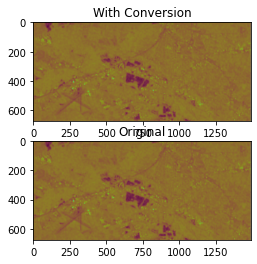

In [17]:
input_png = cv2.imread('Resources/input_image.png')
# input = cv2.cvtColor(input_png,cv2.COLOR_BGR2RGB)
plt.subplot(2,1,2)
plt.title("Original")
plt.imshow(input_png)

input_png = cv2.imread('Resources/input_image.png')
input = cv2.cvtColor(input_png,cv2.COLOR_BGR2RGB)
plt.subplot(2,1,1)
plt.title("With Conversion")
plt.imshow(input_png)




In [23]:
image = cv2.imread('Resources/input_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# plt.figure(figsize=(20, 20))
# # plt.subplot(3, 2, 1)
# plt.title("Original")
# plt.imshow(image)


ret, thresh = cv2.threshold(image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cnts, heir = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img = image.copy()
contour = cv2.drawContours(img,cnts,-1,(0,255,0),3)
plt.imshow(contour)
plt.show()

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


# Area of Flooded Region

In [14]:
RATIO_PIXEL_TO_CM = 78 # 78 pixels are 1cm
RATIO_PIXEL_TO_SQUARE_CM = 78 * 78



In [ ]:
# 2. Calculate area
area_px = cv2.contourArea(object_contours)
area_cm = round(area_px / RATIO_PIXEL_TO_SQUARE_CM, 2)

# Erosion


Defining Kernel for Morphology operations

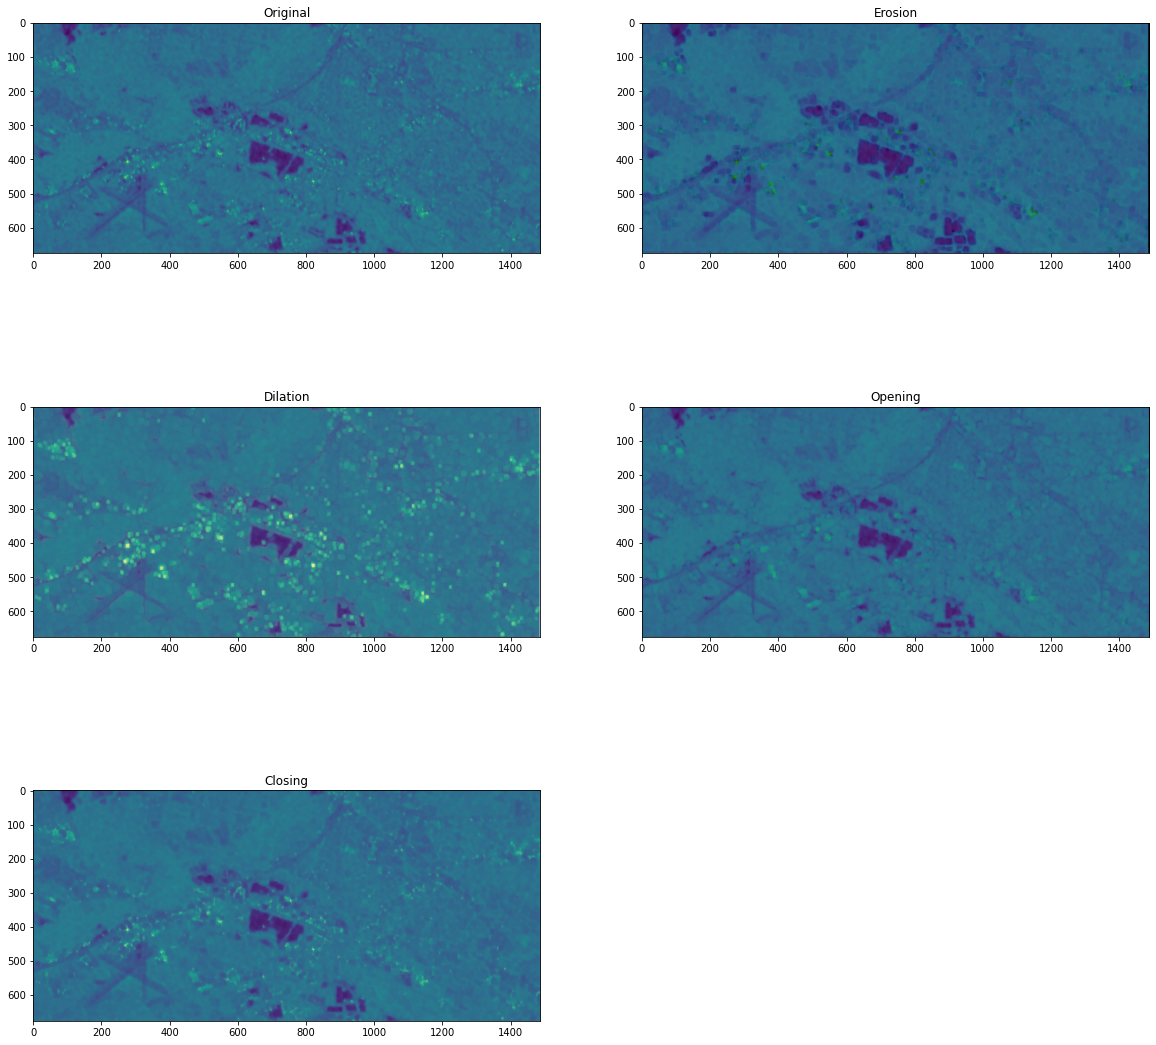

In [21]:
image = cv2.imread('Resources/input_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))
plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)


# Let's define our kernel size
kernel = np.ones((7,7), np.uint8)

# Now we erode
erosion = cv2.erode(image, kernel, iterations = 1)

plt.subplot(3, 2, 2)
plt.title("Erosion")
plt.imshow(erosion)

# Dialation
dilation = cv2.dilate(image, kernel, iterations = 1)
plt.subplot(3, 2, 3)
plt.title("Dilation")
plt.imshow(dilation)


# Opening - Good for removing noise
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
plt.subplot(3, 2, 4)
plt.title("Opening")
plt.imshow(opening)


# Closing - Good for removing noise
closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
plt.subplot(3, 2, 5)
plt.title("Closing")
plt.imshow(closing)

In [27]:
image = cv2.imread('Resouces/input_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = image.shape

# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)

plt.figure(figsize=(20, 20))

plt.subplot(3, 2, 1)
plt.title("Original")
plt.imshow(image)

plt.subplot(3, 2, 2)
plt.title("Sobel X")
plt.imshow(sobel_x)


plt.subplot(3, 2, 3)
plt.title("Sobel Y")
plt.imshow(sobel_y)

sobel_OR = cv2.bitwise_or(sobel_x, sobel_y)

plt.subplot(3, 2, 4)
plt.title("sobel_OR")
plt.imshow(sobel_OR)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

plt.subplot(3, 2, 5)
plt.title("Laplacian")
plt.imshow(laplacian)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Canny Edge Detection 

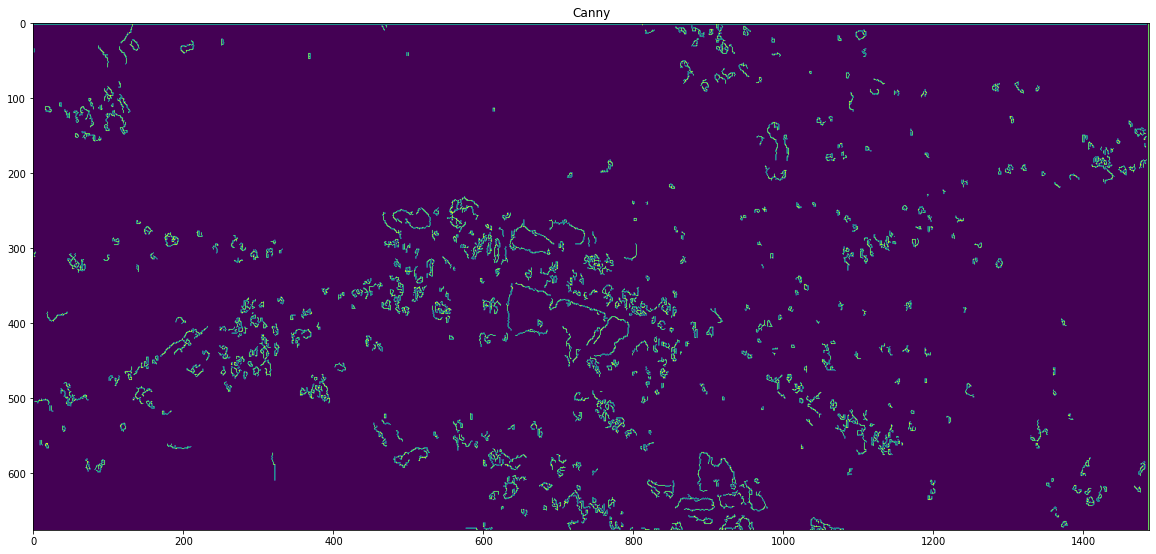

In [13]:
image = cv2.imread('Resources/input_image.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width,_ = image.shape

canny = cv2.Canny(image,40,120)

# plt.subplot(3, 2, 6)
plt.figure(figsize=(20, 20))
plt.title("Canny")
plt.imshow(canny)